In [1]:
import pandas as pd
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import os
import numpy as np
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from functions import assign_category, date_engineering, one_hot_encoding, add_activity_quantile, is_weekend

ModuleNotFoundError: No module named 'dataprep'

In [40]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [41]:
# Load environment variables
try:
    load_dotenv()
except:
    pass

mongo_url = os.getenv('MONGO_URL')
mongo_port = int(os.getenv('MONGO_PORT'))
mongo_username = os.getenv('MONGO_USERNAME')
mongo_password = os.getenv('MONGO_PASSWORD')
mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

In [42]:
# connect to mongodb
client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
db = client['depresjon-dataset']
collection = db['depresjon']

In [43]:
cursor = collection.find({})
df = pd.DataFrame(list(cursor))
df

,_id,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,659fad05804628716592fcb0,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,659fad05804628716592fcb1,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,659fad05804628716592fcb2,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,659fad05804628716592fcb3,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,659fad05804628716592fcb4,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,659fad0f8046287165aaf825,2003-12-01 12:53:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571702,659fad0f8046287165aaf826,2003-12-01 12:54:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571703,659fad0f8046287165aaf827,2003-12-01 12:55:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571704,659fad0f8046287165aaf828,2003-12-01 12:56:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN


In [44]:
df.drop('_id', axis=1, inplace=True)

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = is_weekend(df)
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07 12:00:00,2003-05-07 12:00:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
1,2003-05-07 12:01:00,2003-05-07 12:01:00,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
2,2003-05-07 12:02:00,2003-05-07 12:02:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
3,2003-05-07 12:03:00,2003-05-07 12:03:00,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
4,2003-05-07 12:04:00,2003-05-07 12:04:00,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,2003-12-01 12:53:00,2003-12-01 12:53:00,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN,0.0
1571702,2003-12-01 12:54:00,2003-12-01 12:54:00,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN,0.0
1571703,2003-12-01 12:55:00,2003-12-01 12:55:00,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN,0.0
1571704,2003-12-01 12:56:00,2003-12-01 12:56:00,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN,0.0


In [46]:
df = df.dropna(subset=['madrs_mean'])
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07 12:00:00,2003-05-07 12:00:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
1,2003-05-07 12:01:00,2003-05-07 12:01:00,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
2,2003-05-07 12:02:00,2003-05-07 12:02:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
3,2003-05-07 12:03:00,2003-05-07 12:03:00,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
4,2003-05-07 12:04:00,2003-05-07 12:04:00,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10 15:03:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
551712,2004-06-10 15:04:00,2004-06-10 15:04:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
551713,2004-06-10 15:05:00,2004-06-10 15:05:00,449,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
551714,2004-06-10 15:06:00,2004-06-10 15:06:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0


In [47]:
df = df.copy()
df['Dates'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend,Dates,Time
0,2003-05-07 12:00:00,2003-05-07 12:00:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0,2003-05-07,12:00:00
1,2003-05-07 12:01:00,2003-05-07 12:01:00,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0,2003-05-07,12:01:00
2,2003-05-07 12:02:00,2003-05-07 12:02:00,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0,2003-05-07,12:02:00
3,2003-05-07 12:03:00,2003-05-07 12:03:00,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0,2003-05-07,12:03:00
4,2003-05-07 12:04:00,2003-05-07 12:04:00,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0,2003-05-07,12:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10 15:03:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0,2004-06-10,15:03:00
551712,2004-06-10 15:04:00,2004-06-10 15:04:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0,2004-06-10,15:04:00
551713,2004-06-10 15:05:00,2004-06-10 15:05:00,449,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0,2004-06-10,15:05:00
551714,2004-06-10 15:06:00,2004-06-10 15:06:00,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0,2004-06-10,15:06:00


In [48]:
df.columns

Index(['timestamp', 'date', 'activity', 'user_id', 'days', 'gender', 'age',
       'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1',
       'madrs2', 'madrs_mean', 'is_weekend', 'Dates', 'Time'],
      dtype='object')

In [49]:
df = df.drop(['date'], axis=1)
df = df[['timestamp', 'Dates', 'Time', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'is_weekend', 'madrs_mean']]
df

,timestamp,Dates,Time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,condition_1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,condition_1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,condition_1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,condition_1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,condition_1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,condition_9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


In [50]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['DayName'] = pd.Series(df['Dates'].dt.day_name(), index=df.index)
df = df[['timestamp', 'Dates', 'Time', 'DayName','user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'is_weekend', 'madrs_mean']]
df['user_id'] = df['user_id'].str.replace('condition_', '')
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


(0.0, 2000.0)

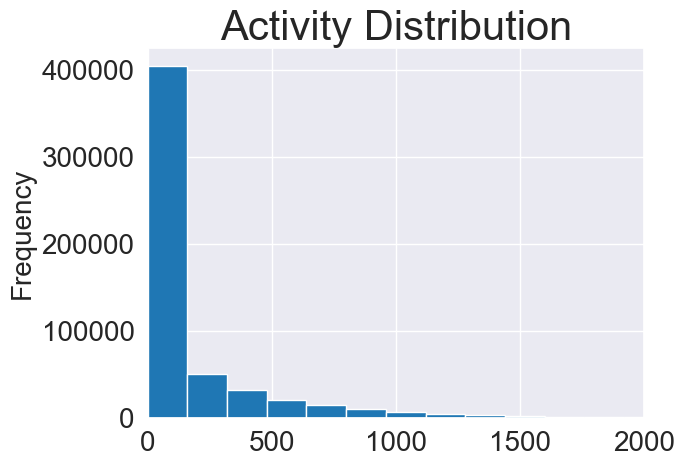

In [51]:
df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
plt.xlim(0,2000)

In [52]:
#scaler = MinMaxScaler()
#activity_data = df['activity'].values.reshape(-1, 1)
#df['activity'] = scaler.fit_transform(activity_data)
#df

In [53]:
#df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
#plt.xlim(0,1)

In [54]:
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


C:\Users\karac\AppData\Local\Temp\ipykernel_7396\3731623335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_day_data['timestamp'] = pd.to_datetime(user_day_data['timestamp'])
C:\Users\karac\AppData\Local\Temp\ipykernel_7396\3731623335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_day_data['Date'] = user_day_data['timestamp'].dt.date
C:\Users\karac\AppData\Local\Temp\ipykernel_7396\3731623335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

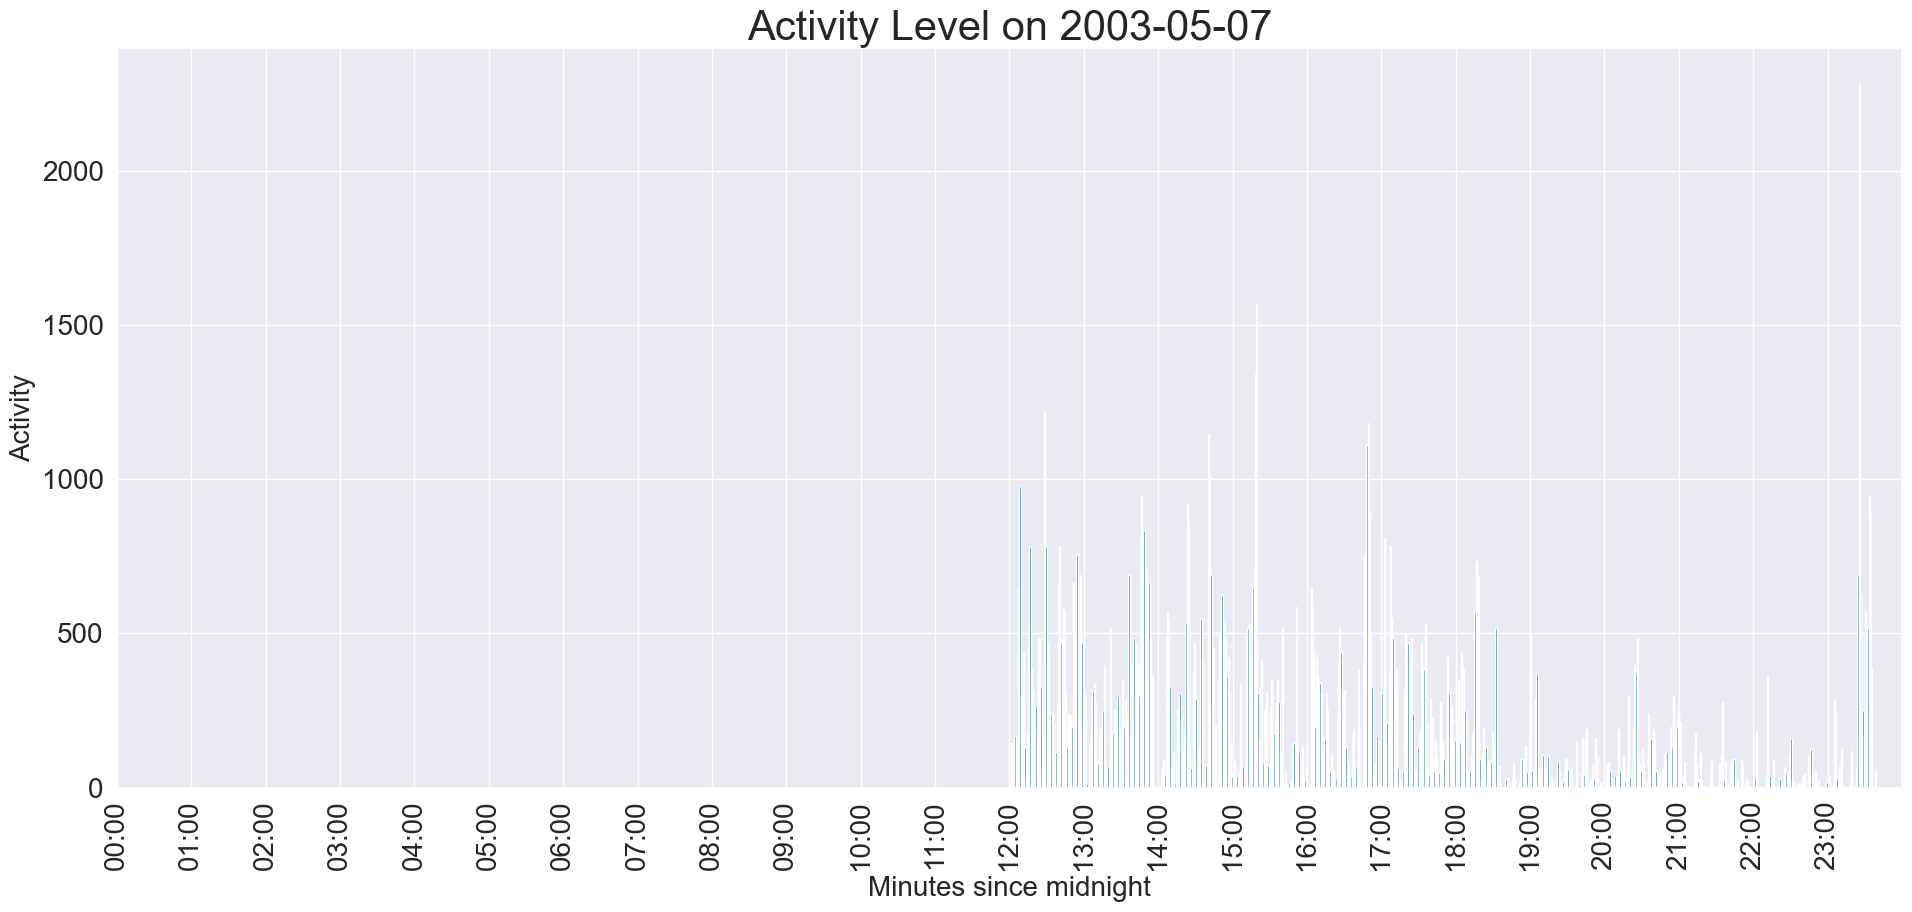

In [55]:
user_data = df[df['user_id'] == 1]
selected_date = '2003-05-07'

user_day_data = user_data[user_data['Dates'] == selected_date]
user_day_data['timestamp'] = pd.to_datetime(user_day_data['timestamp'])
user_day_data['Date'] = user_day_data['timestamp'].dt.date  
user_day_data['Time'] = user_day_data['timestamp'].dt.time  
user_day_data = user_day_data[user_day_data['Date'] == pd.to_datetime(selected_date).date()]

# Plotting
plt.figure(figsize=(20, 10))  
user_day_data['Minutes'] = user_day_data['timestamp'].dt.hour * 60 + user_day_data['timestamp'].dt.minute
plt.bar(user_day_data['Minutes'], user_day_data['activity'], width=1, align='edge')
plt.title(f'Activity Level on {selected_date}')
plt.xlabel('Minutes since midnight')
plt.ylabel('Activity')
plt.grid(True)
plt.xticks(ticks=range(0, 1440, 60), labels=[f"{str(i).zfill(2)}:00" for i in range(24)], rotation=90)
plt.xlim(0, 1440)  
plt.tight_layout()
plt.show()

In [56]:
# Get a list of unique participants
#participants = df['user_id'].unique()

#for participant in participants:
#    user_data = df[df['user_id'] == participant]
#    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
#    user_data['Date'] = user_data['timestamp'].dt.date
#    user_data['Time'] = user_data['timestamp'].dt.time

#    unique_days = user_data['Date'].unique()

#    fig, axes = plt.subplots(len(unique_days), 1, figsize=(10, 2 * len(unique_days)), sharex=True)
#    user_data['TimeDelta'] = user_data['timestamp'] - user_data['timestamp'].dt.normalize()
#    user_data['Minutes'] = user_data['TimeDelta'].dt.total_seconds() / 60

#    for ax, day in zip(axes, unique_days):
#        day_data = user_data[user_data['Date'] == day]
#        ax.bar(day_data['Minutes'], day_data['activity'], width=1, align='edge')
#        ax.set_title(f'Activity on {day} - Participant {participant}')
#        ax.set_ylabel('Activity')
#    plt.grid(True)
#    plt.xticks(ticks=range(0, 1440, 60), labels=[f"{str(i).zfill(2)}:00" for i in range(24)],#rotation=90)
#   plt.xlim(0, 1440)  # Set x-axis limit to cover one day
#    plt.xlabel('Minutes since start of day')
#    plt.tight_layout()
#    plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.png"%participant,#bbox_inches='tight')
#   plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.eps"%participant,bbox_inches='tight')
#    plt.close()

In [57]:
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


In [58]:
df["category_madrs"] = df["madrs_mean"].apply(assign_category) # in this way we transform the problem into a binary classification problem
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean,category_madrs
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression


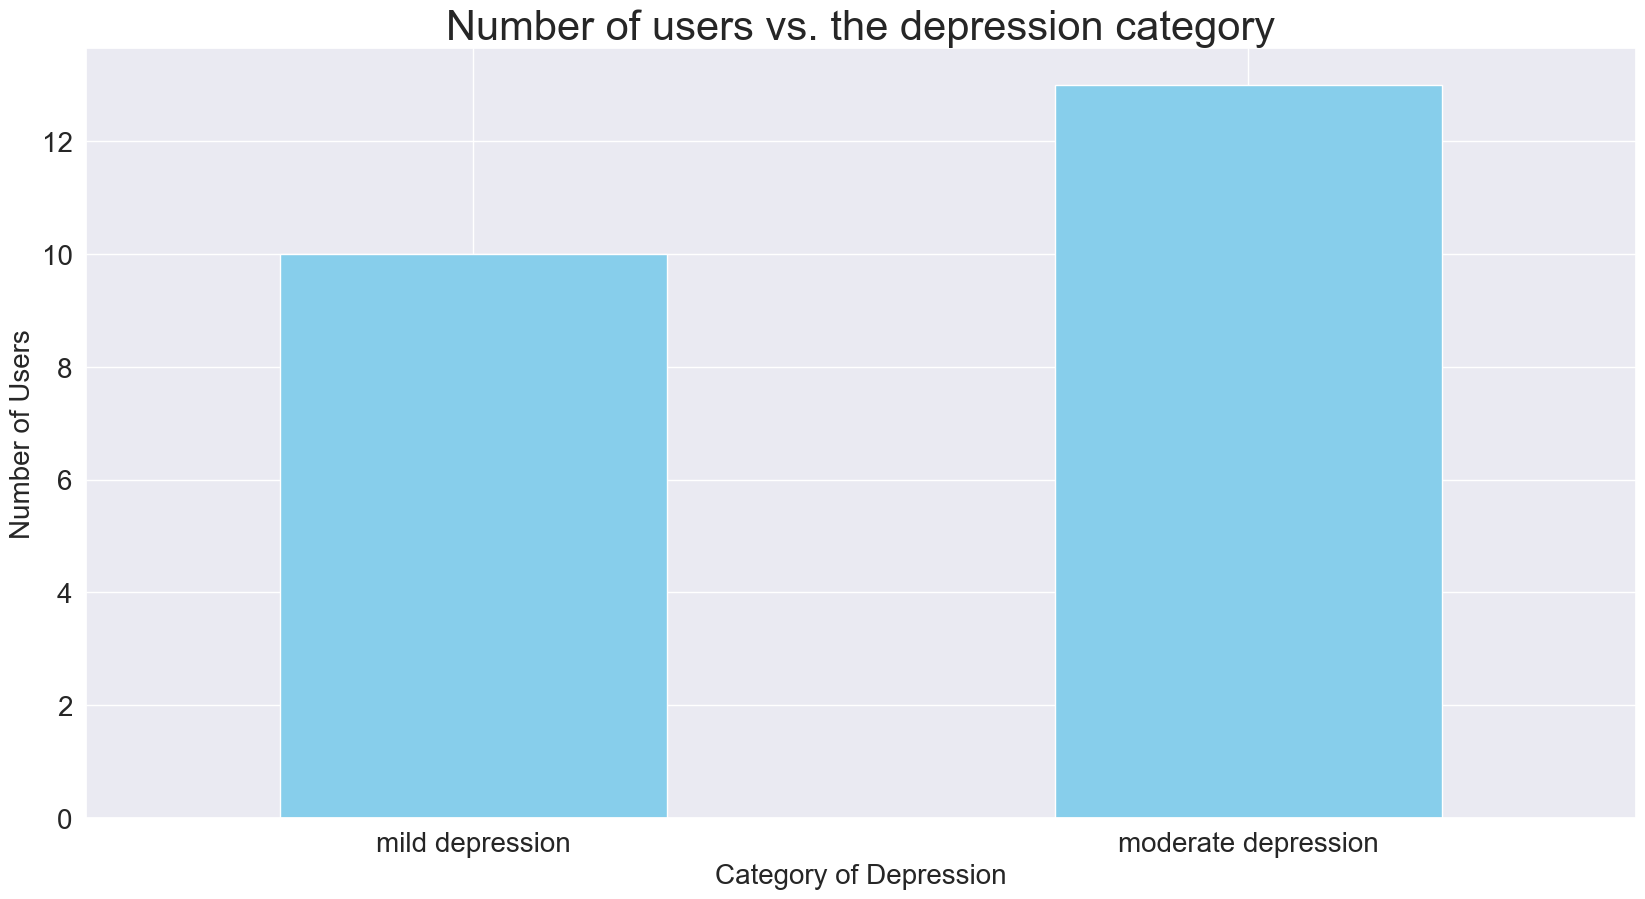

In [59]:
category_user_counts = df.groupby('category_madrs')['user_id'].nunique()
plt.figure(figsize=(20, 10))
category_user_counts.plot(kind='bar', color='skyblue')
plt.title('Number of users vs. the depression category')
plt.xlabel('Category of Depression')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.savefig("../visualizations/depresjon/binary-problem.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/binary-problem.eps",bbox_inches='tight')
plt.show()

In [60]:
# Create a new column 'is_sleeping' which is 1 if the activity is below 100 and the timestamp is between midnight and 7 AM
#user_data['is_sleeping'] = ((user_data['activity'] < 100) & ((user_data['timestamp'].dt.hour >= 0) & (user_data['timestamp'].dt.hour < 7))).astype(int)

In [61]:
df = date_engineering(df)
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,...,madrs_mean,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394


In [62]:
df.drop(columns= ['timestamp', 'Dates', 'Time', 'DayName', 'madrs1', 'madrs2', 'madrs_mean'], axis=1, inplace=True)
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
2,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
3,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
4,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551712,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551713,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551714,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394


In [63]:
df['age'].value_counts()

45-49    128358
35-39     91074
40-44     82420
50-54     64255
30-34     57332
25-29     40855
20-24     22175
55-59     21829
65-69     21772
60-64     21646
Name: age, dtype: int64

In [64]:
df = one_hot_encoding(df)
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,1,0,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,1,143,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
2,1,0,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
3,1,20,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
4,1,166,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,0.0,0,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551712,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,0.0,0,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551713,9,449,13,2,2,1.0,2.0,2.0,1,1.0,...,0.0,0,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394
551714,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,0.0,0,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394


In [65]:
df = add_activity_quantile(df)
df

C:\Users\karac\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["user_activity_quantile"] = pd.qcut(user_df["activity"].rank(method='first'), [0, .25, .75, 1],
C:\Users\karac\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["user_activity_quantile"] = pd.qcut(user_df["activity"].rank(method='first'), [0, .25, .75, 1],
C:\Users\kar

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,1,0,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,0,0
1,1,143,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
2,1,0,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,0,0
3,1,20,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
4,1,166,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394,1,1
551712,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394,1,1
551713,9,449,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394,2,2
551714,9,0,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.433884,-0.24869,0.897805,0.623490,-0.900969,0.968583,-0.440394,1,1


In [66]:
df.columns

Index(['user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch',
       'inpatient', 'edu', 'marriage', 'work', 'is_weekend', 'category_madrs',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 'month_cos',
       'weekday_cos', 'week_cos', 'day_cos', 'activity_quantile',
       'user_activity_quantile'],
      dtype='object')

In [67]:
df = df[df['edu'] != ' ']

In [68]:
df.to_pickle("../data/depresjon/depresjon_preprocessed.pkl")

C:\Users\karac\AppData\Local\Temp\ipykernel_7396\3883162340.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


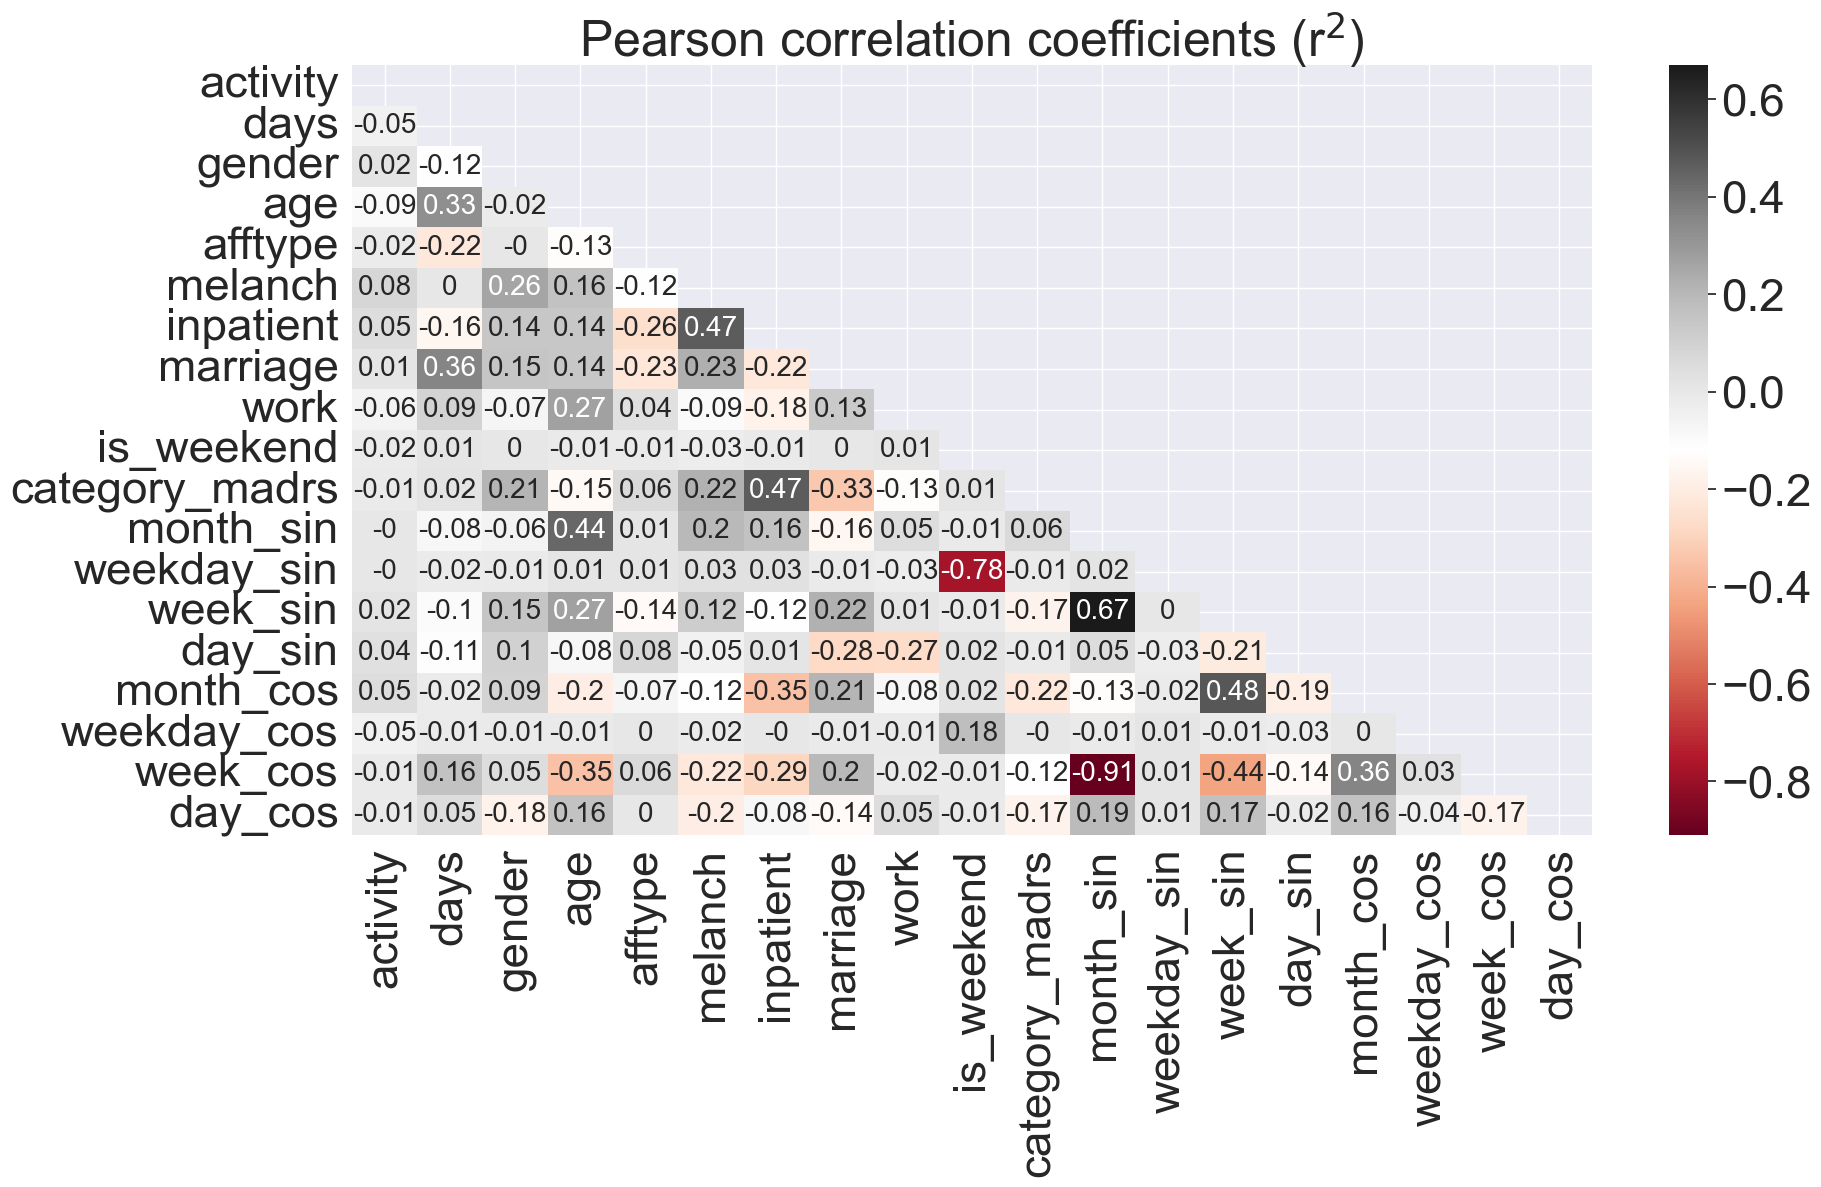

In [69]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
sns.set(font_scale = 3)
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size":20}, mask=mask, cmap='RdGy', xticklabels=True, yticklabels=True)
#plt.text(32, 20, 'Pearson correlation coefficients (r$^2$)', rotation=270, fontsize=50)
plt.title('Pearson correlation coefficients (r$^2$)')
plt.savefig("../visualizations/depresjon/correlation_matrix.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/correlation_matrix.eps",bbox_inches='tight')
plt.show()